In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
%matplotlib inline

DDoS = pd.read_csv('/content/dataset_sdn.csv')
DDoS.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0


In [2]:
DDoS.Protocol.unique()
DDoS['Protocol'] = DDoS['Protocol'].replace('TCP', '0')
DDoS['Protocol'] = DDoS['Protocol'].replace('UDP', '1')
DDoS['Protocol'] = DDoS['Protocol'].replace('ICMP', '2')
DDoS.Protocol.unique()

array(['1', '0', '2'], dtype=object)

In [3]:
DDoS['src'] = DDoS['src'].replace('10.0.0.0', '0')
DDoS['src'] = DDoS['src'].replace('10.0.0.2', '1')
DDoS['src'] = DDoS['src'].replace('10.0.0.4', '2')
DDoS['src'] = DDoS['src'].replace('10.0.0.10', '3')
DDoS['src'] = DDoS['src'].replace('10.0.0.5', '4')
DDoS['src'] = DDoS['src'].replace('10.0.0.13', '5')
DDoS['src'] = DDoS['src'].replace('10.0.0.6', '6')
DDoS['src'] = DDoS['src'].replace('10.0.0.11', '7')
DDoS['src'] = DDoS['src'].replace('10.0.0.20', '8')
DDoS['src'] = DDoS['src'].replace('10.0.0.18', '9')
DDoS['src'] = DDoS['src'].replace('10.0.0.12', '10')
DDoS['src'] = DDoS['src'].replace('10.0.0.14', '11')
DDoS['src'] = DDoS['src'].replace('10.0.0.15', '12')
DDoS['src'] = DDoS['src'].replace('10.0.0.16', '13')
DDoS['src'] = DDoS['src'].replace('10.0.0.17', '14')
DDoS['src'] = DDoS['src'].replace('10.0.0.1', '15')
DDoS['src'] = DDoS['src'].replace('10.0.0.3', '16')
DDoS['src'] = DDoS['src'].replace('10.0.0.8', '17')
DDoS['src'] = DDoS['src'].replace('10.0.0.7', '18')
DDoS['src'] = DDoS['src'].replace('10.0.0.9', '19')
DDoS.src.unique()

array(['15', '1', '2', '3', '16', '4', '5', '6', '8', '7', '10', '9',
       '17', '18', '19', '11', '12', '13', '14'], dtype=object)

In [4]:
DDoS['dst'] = DDoS['dst'].replace('10.0.0.8', '0')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.7', '1')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.2', '2')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.4', '3')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.6', '4')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.10', '5')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.3', '6')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.6', '7')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.5', '8')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.9', '9')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.12', '10')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.13', '11')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.14', '12')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.11', '13')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.16', '14')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.1', '15')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.15', '16')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.17', '17')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.18', '18')
DDoS.dst.unique()

array(['0', '1', '6', '8', '5', '11', '15', '13', '2', '3', '9', '4',
       '12', '16', '10', '14', '17', '18'], dtype=object)

In [5]:
DDoS["rx_kbps"] = DDoS["rx_kbps"].fillna(DDoS["rx_kbps"].mean())

In [6]:
DDoS["tot_kbps"] = DDoS["tot_kbps"].fillna(DDoS["tot_kbps"].mean())

In [7]:
from sklearn.model_selection import train_test_split
X = DDoS[['src','dst','dt', 'switch', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur',
       'flows', 'packetins', 'pktperflow', 'byteperflow', 'pktrate',
       'Pairflow','Protocol' ,'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps',
       'tot_kbps']]
y = DDoS['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [8]:
DDoS.isnull().sum()

dt             0
switch         0
src            0
dst            0
pktcount       0
bytecount      0
dur            0
dur_nsec       0
tot_dur        0
flows          0
packetins      0
pktperflow     0
byteperflow    0
pktrate        0
Pairflow       0
Protocol       0
port_no        0
tx_bytes       0
rx_bytes       0
tx_kbps        0
rx_kbps        0
tot_kbps       0
label          0
dtype: int64

In [9]:
# Feature scaling (or standardization)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(62607, 22)
(62607,)
(41738, 22)
(41738,)


In [11]:
import tensorflow
model=tensorflow.keras.models.Sequential()
#Hidden layer definitions
model.add(tensorflow.keras.layers.Dense(units=22, activation='relu', input_shape = X_train.shape[1:]))
model.add(tensorflow.keras.layers.Dense(units=30, activation='relu'))
model.add(tensorflow.keras.layers.Dropout(0.2))
model.add(tensorflow.keras.layers.Dense(units=30, activation='relu' ))
model.add(tensorflow.keras.layers.Dropout(0.2))
model.add(tensorflow.keras.layers.Dense(units=30, activation='relu' ))
#OP layer
model.add(tensorflow.keras.layers.Dense(units=2, activation='sigmoid' ))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 22)                506       
                                                                 
 dense_1 (Dense)             (None, 30)                690       
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 dense_2 (Dense)             (None, 30)                930       
                                                                 
 dropout_1 (Dropout)         (None, 30)                0         
                                                                 
 dense_3 (Dense)             (None, 30)                930       
                                                                 
 dense_4 (Dense)             (None, 2)                 6

In [13]:
#compile
model.compile(loss='sparse_categorical_crossentropy' , optimizer='adam' , metrics=['accuracy'])

#fit
history=model.fit(x=X_train, y=y_train, validation_split=0.1, epochs=20, batch_size=16)

Epoch 1/20
3522/3522 [==============================] - 12s 3ms/step - loss: 0.1310 - accuracy: 0.9449 - val_loss: 0.0838 - val_accuracy: 0.9660
Epoch 2/20
3522/3522 [==============================] - 10s 3ms/step - loss: 0.0813 - accuracy: 0.9669 - val_loss: 0.0587 - val_accuracy: 0.9757
Epoch 3/20
3522/3522 [==============================] - 9s 3ms/step - loss: 0.0620 - accuracy: 0.9747 - val_loss: 0.0490 - val_accuracy: 0.9778
Epoch 4/20
3522/3522 [==============================] - 10s 3ms/step - loss: 0.0523 - accuracy: 0.9790 - val_loss: 0.0463 - val_accuracy: 0.9813
Epoch 5/20
3522/3522 [==============================] - 10s 3ms/step - loss: 0.0456 - accuracy: 0.9818 - val_loss: 0.0344 - val_accuracy: 0.9861
Epoch 6/20
3522/3522 [==============================] - 9s 3ms/step - loss: 0.0416 - accuracy: 0.9836 - val_loss: 0.0337 - val_accuracy: 0.9853
Epoch 7/20
3522/3522 [==============================] - 9s 2ms/step - loss: 0.0379 - accuracy: 0.9851 - val_loss: 0.0305 - val_accur

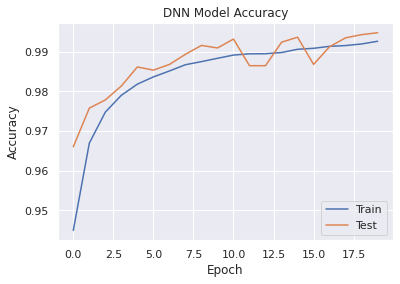

In [14]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('DNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.savefig('DNN Model Accuracy.png')
plt.show()

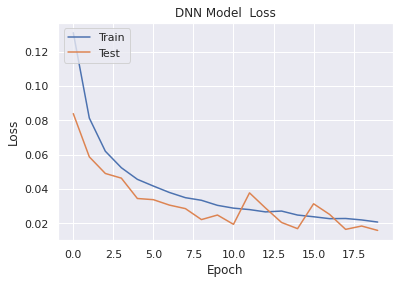

In [15]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('DNN Model  Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('DNN Model Loss.png')
plt.show()

In [16]:
predict = model.predict(X_test, verbose=1)

1305/1305 [==============================] - 2s 1ms/step


In [17]:
tp = 0
tn = 0
fp = 0
fn = 0
predictn = predict.flatten().round()
predictn = predictn.tolist()
Y_testn = y_test.tolist()
for i in range(len(Y_testn)):
  if predictn[i]==1 and Y_testn[i]==1:
    tp+=1
  elif predictn[i]==0 and Y_testn[i]==0:
    tn+=1
  elif predictn[i]==0 and Y_testn[i]==1:
    fp+=1
  elif predictn[i]==1 and Y_testn[i]==0:
    fn+=1

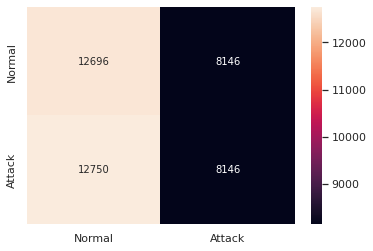

In [18]:
to_heat_map =[[tn,fp],[fn,tp]]
to_heat_map = pd.DataFrame(to_heat_map, index = ["Normal","Attack"],columns = ["Normal","Attack"])
ax = sns.heatmap(to_heat_map,annot=True, fmt="d")

In [19]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 99.39%
